# Natural Language Processing with Python
## Chapter 5 Categorizing and Tagging Words
### 1. Using a Tagger

In [1]:
import nltk
words = nltk.word_tokenize("And now for something completely different")
nltk.pos_tag(words)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [3]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


### 2. Tagged Corpora
#### 2.1 Representing Tagged Tokens

In [5]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
print([nltk.tag.str2tuple(i) for i in sent.split()])

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]


#### 2.2 Reading Tagged Corpora

In [6]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

#### 2.3 A Universal Part-of-Speech Tagset
#### 2.4 Nouns
#### 2.5 Verbs
#### 2.6 Adjectives and Adverbs
#### 2.7 Unsimplified Tags
#### 2.8 Exploring Tagged Corpora
### 3. Mapping Words to Properties Using Python Dictionaries
#### 3.1 Indexing Lists vs Dictionaries
#### 3.2 Dictionaries in Python
#### 3.3 Defining Dictionaries
#### 3.4 Default Dictionaries
#### 3.5 Incrementally Updating a Dictionary
#### 3.6 Complex Keys and Values
#### 3.7 Inverting a Dictionary
### 4. Automatic Tagging
#### 4.1 The Default Tagger

In [2]:
from nltk.corpus import brown
BTaggedSents = brown.tagged_sents(categories='news')
BSents = brown.sents(categories='news')

In [12]:
tags = [tag[1] for tag in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [102]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
TokenRaw = nltk.word_tokenize(raw)
DefaultTagger = nltk.DefaultTagger('NN')
DefaultTagger.tag(TokenRaw)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [15]:
DefaultTagger.evaluate(BTaggedSents)

0.13089484257215028

#### 4.2 The Regular Expression Tagger

In [22]:
patterns = [
     (r'.*ing$', 'VBG'),                # gerunds
     (r'.*ed$', 'VBD'),                 # simple past
     (r'.*es$', 'VBZ'),                 # 3rd singular present
     (r'.*ould$', 'MD'),                # modals
     (r'.*\'s$', 'NN$'),                # possessive nouns
     (r'.*s$', 'NNS'),                  # plural nouns
     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')]                      # nouns (default) 
ReExpTagger = nltk.RegexpTagger(patterns)
ReExpTagger.evaluate(BTaggedSents)

0.20186168625812995

#### 4.3 The Lookup Tagger

In [31]:
FD = nltk.FreqDist(brown.words(categories='news'))
MostCommon = FD.most_common(100)
CFD = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
LikelyTags = dict((word,CFD[word].max()) for (word,_) in MostCommon)
LookUpTagger = nltk.UnigramTagger(model=LikelyTags)
LookUpTagger.evaluate(BTaggedSents)

0.45578495136941344

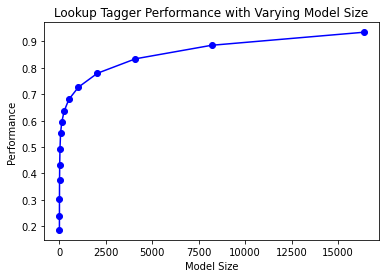

In [36]:
import pylab
def performance(cfd,WordList):
    model = dict((word,cfd[word].max()) for word in WordList)
    tagger = nltk.UnigramTagger(model=model,backoff=DefaultTagger)
    return tagger.evaluate(BTaggedSents)
def display():
    WordFD = nltk.FreqDist(brown.words(categories='news')).most_common()
    WordList = [word for (word,_) in WordFD]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perf = [performance(cfd,WordList[:size]) for size in sizes]
    pylab.plot(sizes,perf,'-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
display()

#### 4.4 Evaluation
### 5. N-Gram Tagging
#### 5.1 Unigram Tagging

In [37]:
UnigramTagger = nltk.UnigramTagger(BTaggedSents)
UnigramTagger.evaluate(BTaggedSents)

0.9349006503968017

#### 5.2 Separating the Training and Testing Data

In [3]:
size = int(len(BTaggedSents)*0.9)
BTaggedTrain = BTaggedSents[:size]
BTaggedTest = BTaggedSents[size:]
UnigramTagger = nltk.UnigramTagger(BTaggedTrain)
UnigramTagger.evaluate(BTaggedTest)

0.8121200039868434

#### 5.3 General N-Gram Tagging

In [39]:
BigramTagger = nltk.BigramTagger(BTaggedTrain)
BigramTagger.evaluate(BTaggedTest)

0.10206319146815508

#### 5.4 Combining Taggers

In [41]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(BTaggedTrain,backoff=t0)
t2 = nltk.BigramTagger(BTaggedTrain,backoff=t1)
tagger = nltk.TrigramTagger(BTaggedTrain,cutoff=2,backoff=t2)
tagger.evaluate(BTaggedTest)

0.84411442240606

#### 5.5 Tagging Unknown Words
#### 5.6 Storing Taggers
#### 5.7 Performance Limitations

In [42]:
AmbiCFD = nltk.ConditionalFreqDist(
    ((x[1],y[1],z[0]),z[1])
    for sent in BTaggedSents
    for x,y,z in nltk.trigrams(sent)
)
AmbiCon = [c for c in AmbiCFD.conditions() if len(AmbiCFD[c]) > 1]
sum(AmbiCFD[c].N() for c in AmbiCon)/AmbiCFD.N()

0.049297702068029296

In [46]:
TestTags = [tag for sent in brown.sents(categories='news') for (word,tag) in tagger.tag(sent)]
RightTags = [tag for (word,tag) in brown.tagged_words(categories='news')]
nltk.ConfusionMatrix(RightTags,TestTags)

<ConfusionMatrix: 96727/100554 correct>

### 6. Transformation-Based Tagging

In [47]:
from nltk.tbl import demo as BrillDemo
BrillDemo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

### 7. How to Determine the Category of a Word
#### 7.1 Morphological Clues
#### 7.2 Syntactic Clues
#### 7.3 Semantic Clues
#### 7.4 New Words
#### 7.5 Morphology in Part of Speech Tagsets
### 8. Summary
### 9. Further Reading
### 10. Exercises

#### 1. Search the web for "spoof newspaper headlines", to find such gems as: British Left Waffles on Falkland Islands, and Juvenile Court to Try Shooting Defendant. Manually tag these headlines to see if knowledge of the part-of-speech tags removes the ambiguity.
#### 2. Working with someone else, take turns to pick a word that can be either a noun or a verb (e.g. contest); the opponent has to predict which one is likely to be the most frequent in the Brown corpus; check the opponent's prediction, and tally the score over several turns.
#### 3. Tokenize and tag the following sentence: They wind back the clock, while we chase after the wind. What different pronunciations and parts of speech are involved?

In [48]:
raw = 'They wind back the clock, while we chase after the wind'
RawToken = nltk.word_tokenize(raw)
nltk.pos_tag(RawToken)

[('They', 'PRP'),
 ('wind', 'VBP'),
 ('back', 'RB'),
 ('the', 'DT'),
 ('clock', 'NN'),
 (',', ','),
 ('while', 'IN'),
 ('we', 'PRP'),
 ('chase', 'VBP'),
 ('after', 'IN'),
 ('the', 'DT'),
 ('wind', 'NN')]

#### 4. Review the mappings in 3.1. Discuss any other examples of mappings you can think of. What type of information do they map from and to?
#### 5. Using the Python interpreter in interactive mode, experiment with the dictionary examples in this chapter. Create a dictionary `d`, and add some entries. What happens if you try to access a non-existent entry, e.g. `d['xyz']`?
#### 6. Try deleting an element from a dictionary `d`, using the syntax `del d['abc']`. Check that the item was deleted.
#### 7. Create two dictionaries, `d1` and `d2`, and add some entries to each. Now issue the command `d1.update(d2)`. What did this do? What might it be useful for?
#### 8. Create a dictionary `e`, to represent a single lexical entry for some word of your choice. Define keys like `headword`, `part-of-speech`, `sense`, and `example`, and assign them suitable values.
#### 9. Satisfy yourself that there are restrictions on the distribution of go and went, in the sense that they cannot be freely interchanged in the kinds of contexts illustrated in (3d) in 7.
#### 10. Train a unigram tagger and run it on some new text. Observe that some words are not assigned a tag. Why not?
#### 11. Learn about the affix tagger (type `help(nltk.AffixTagger)`). Train an affix tagger and run it on some new text. Experiment with different settings for the affix length and the minimum word length. Discuss your findings.

In [8]:
import nltk
AffTagger = nltk.AffixTagger(BTaggedTrain,affix_length=2)
AffTagger.evaluate(BTaggedTest)

0.20751519984052627

#### 12. Train a bigram tagger with no backoff tagger, and run it on some of the training data. Next, run it on some new data. What happens to the performance of the tagger? Why?

In [10]:
BiTagger = nltk.BigramTagger(BTaggedTrain)
print(BiTagger.evaluate(BTaggedTrain))
BiTagger.evaluate(BTaggedTest)

0.7884137382485832


0.10206319146815508

#### 13. We can use a dictionary to specify the values to be substituted into a formatting string. Read Python's library documentation for formatting strings http://docs.python.org/lib/typesseq-strings.html and use this method to display today's date in two different formats.
#### 14. Use `sorted()` and `set()` to get a sorted list of tags used in the Brown corpus, removing duplicates.

In [15]:
print(sorted(set([i[1] for i in brown.tagged_words()])))

["'", "''", '(', '(-HL', ')', ')-HL', '*', '*-HL', '*-NC', '*-TL', ',', ',-HL', ',-NC', ',-TL', '--', '---HL', '.', '.-HL', '.-NC', '.-TL', ':', ':-HL', ':-TL', 'ABL', 'ABN', 'ABN-HL', 'ABN-NC', 'ABN-TL', 'ABX', 'AP', 'AP$', 'AP+AP-NC', 'AP-HL', 'AP-NC', 'AP-TL', 'AT', 'AT-HL', 'AT-NC', 'AT-TL', 'AT-TL-HL', 'BE', 'BE-HL', 'BE-TL', 'BED', 'BED*', 'BED-NC', 'BEDZ', 'BEDZ*', 'BEDZ-HL', 'BEDZ-NC', 'BEG', 'BEM', 'BEM*', 'BEM-NC', 'BEN', 'BEN-TL', 'BER', 'BER*', 'BER*-NC', 'BER-HL', 'BER-NC', 'BER-TL', 'BEZ', 'BEZ*', 'BEZ-HL', 'BEZ-NC', 'BEZ-TL', 'CC', 'CC-HL', 'CC-NC', 'CC-TL', 'CC-TL-HL', 'CD', 'CD$', 'CD-HL', 'CD-NC', 'CD-TL', 'CD-TL-HL', 'CS', 'CS-HL', 'CS-NC', 'CS-TL', 'DO', 'DO*', 'DO*-HL', 'DO+PPSS', 'DO-HL', 'DO-NC', 'DO-TL', 'DOD', 'DOD*', 'DOD*-TL', 'DOD-NC', 'DOZ', 'DOZ*', 'DOZ*-TL', 'DOZ-HL', 'DOZ-TL', 'DT', 'DT$', 'DT+BEZ', 'DT+BEZ-NC', 'DT+MD', 'DT-HL', 'DT-NC', 'DT-TL', 'DTI', 'DTI-HL', 'DTI-TL', 'DTS', 'DTS+BEZ', 'DTS-HL', 'DTX', 'EX', 'EX+BEZ', 'EX+HVD', 'EX+HVZ', 'EX+MD', '

#### 15. Write programs to process the Brown Corpus and find answers to the following questions:
##### a. Which nouns are more common in their plural form, rather than their singular form? (Only consider regular plurals, formed with the -s suffix.)
##### b. Which word has the greatest number of distinct tags. What are they, and what do they represent?
##### c. List tags in order of decreasing frequency. What do the 20 most frequent tags represent?
##### d. Which tags are nouns most commonly found after? What do these tags represent?

In [59]:
NounList = [(i[0].lower(),i[1]) for i in brown.tagged_words() if 'NN' in i[1]]
NounSet = set([i[0] for i in NounList])
NounPlural = [i[0] for i in NounList if i[0].endswith('s') and i[0][:-1] in NounSet]
NounPluralSet = set(NounPlural)
NounSing = [i[0] for i in NounList if i[0]+'s' in NounPluralSet]
PluralFd = nltk.FreqDist(NounPlural)
SingFd = nltk.FreqDist(NounSing)
for i in [i for i in PluralFd if PluralFd[i] > SingFd[i[:-1]]][:30]:
    print(i,PluralFd[i],i[:-1],SingFd[i[:-1]])

years 949 year 656
eyes 401 eye 122
things 368 thing 333
members 325 member 137
students 213 student 131
minutes 196 minute 44
means 191 mean 12
months 189 month 130
conditions 180 condition 90
nations 175 nation 139
hours 174 hour 145
miles 169 mile 48
friends 161 friend 130
terms 160 term 76
sales 133 sale 44
arms 121 arm 93
steps 118 step 110
corps 110 corp 1
products 108 product 87
elements 107 element 52
leaders 107 leader 74
factors 105 factor 71
relations 102 relation 63
events 101 event 81
trees 101 tree 58
techniques 99 technique 60
gas 98 ga 1
institutions 98 institution 41
dollars 97 dollar 46
status 97 statu 1


In [63]:
WordCFD = nltk.ConditionalFreqDist(brown.tagged_words())
[WordCFD[i] for i in WordCFD if len(WordCFD[i]) == 12 ]

[FreqDist({'CS': 6419, 'DT': 1975, 'WPS': 1638, 'WPO': 135, 'QL': 54, 'DT-NC': 6, 'WPS-NC': 3, 'CS-NC': 2, 'WPS-HL': 2, 'CS-HL': 1, ...})]

In [64]:
nltk.FreqDist([i[1] for i in brown.tagged_words()]).most_common(20)

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476),
 ('VB', 33693),
 ('VBN', 29186),
 ('VBD', 26167),
 ('CS', 22143),
 ('PPS', 18253),
 ('VBG', 17893),
 ('PP$', 16872),
 ('TO', 14918),
 ('PPSS', 13802),
 ('CD', 13510)]

In [66]:
nltk.FreqDist([i[1][1] for i in nltk.bigrams(brown.tagged_words()) if 'NN' in i[0][1]]).most_common(20)

[('IN', 57911),
 ('.', 29053),
 (',', 27762),
 ('CC', 13837),
 ('NN', 13793),
 ('NNS', 6802),
 ('VBD', 5218),
 ('CS', 4525),
 ('MD', 4296),
 ('BEZ', 4288),
 ("''", 4248),
 ('RB', 4111),
 ('TO', 3610),
 ('BEDZ', 3001),
 ('VBN', 2912),
 ('WPS', 2372),
 ('NN-TL', 2330),
 ('VBZ', 2313),
 ('VB', 2226),
 ('BER', 2122)]

#### 16. Explore the following issues that arise in connection with the lookup tagger:
##### a. What happens to the tagger performance for the various model sizes when a backoff tagger is omitted?
##### b. Consider the curve in 4.2; suggest a good size for a lookup tagger that balances memory and performance. Can you come up with scenarios where it would be preferable to minimize memory usage, or to maximize performance with no regard for memory usage?
#### 17. What is the upper limit of performance for a lookup tagger, assuming no limit to the size of its table? (Hint: write a program to work out what percentage of tokens of a word are assigned the most likely tag for that word, on average.)


In [68]:
TagCFD = nltk.ConditionalFreqDist(brown.tagged_words())
SumPre = 0
for i in TagCFD:
    MostFreq = TagCFD[i].most_common(1)[0][1]
    precentage = MostFreq/sum(j[1] for j in TagCFD[i].most_common())
    SumPre += precentage
SumPre/len(TagCFD)

0.959904702272461

#### 18. Generate some statistics for tagged data to answer the following questions:
##### a. What proportion of word types are always assigned the same part-of-speech tag?
##### b. How many words are ambiguous, in the sense that they appear with at least two tags?
##### c. What percentage of word tokens in the Brown Corpus involve these ambiguous words?

In [69]:
WordTypes = set(i for i in brown.words())
len([i for i in WordTypes if len(TagCFD[i]) == 1])/len(WordTypes)

0.8442834971546819

In [71]:
len([i for i in [j for j in brown.words()] if len(TagCFD[i]) > 1])/len([i for i in brown.words()])

0.7864892283102192

#### 19. The `evaluate()` method works out how accurately the tagger performs on this text. For example, if the supplied tagged text was `[('the', 'DT'), ('dog', 'NN')]` and the tagger produced the output `[('the', 'NN'), ('dog', 'NN')]`, then the score would be `0.5`. Let's try to figure out how the evaluation method works:
##### a. A tagger `t` takes a list of words as input, and produces a list of tagged words as output. However, `t.evaluate()` is given correctly tagged text as its only parameter. What must it do with this input before performing the tagging?
##### b. Once the tagger has created newly tagged text, how might the `evaluate()` method go about comparing it with the original tagged text and computing the accuracy score?
##### c. Now examine the source code to see how the method is implemented. Inspect `nltk.tag.api.__file__` to discover the location of the source code, and open this file using an editor (be sure to use the `api.py` file and not the compiled `api.pyc` binary file)
#### 20. Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions:
##### a. Produce an alphabetically sorted list of the distinct words tagged as `MD`.
##### b. Identify words that can be plural nouns or third person singular verbs (e.g. deals, flies).
##### c. Identify three-word prepositional phrases of the form `IN + DET + NN` (eg. in the lab).
##### d. What is the ratio of masculine to feminine pronouns?

In [74]:
sorted(set(i[0] for i in brown.tagged_words() if i[1] == 'MD'))

['Can',
 'Could',
 'May',
 'Might',
 'Must',
 'Ought',
 'Shall',
 'Should',
 'Will',
 'Would',
 "c'n",
 'can',
 'colde',
 'could',
 'dare',
 'kin',
 'maht',
 'mai',
 'may',
 'maye',
 'mayst',
 'might',
 'must',
 'need',
 'ought',
 'shall',
 'should',
 'shuld',
 'shulde',
 'wil',
 'will',
 'wilt',
 'wod',
 'wold',
 'wolde',
 'would']

In [76]:
set([i for i in WordTypes if 'NNS' in WordCFD[i] and 'VBZ' in WordCFD[i]][:30])

{'attributes',
 'bases',
 'bats',
 'bellows',
 'blots',
 'clutches',
 'comments',
 'cycles',
 'deeds',
 'delights',
 'drifts',
 'drinks',
 'ends',
 'experiences',
 'fishes',
 'flourishes',
 'hinges',
 'hopes',
 'leaves',
 'makes',
 'means',
 'plans',
 'regrets',
 'replies',
 'rises',
 'senses',
 'shows',
 'tortures',
 'toys',
 'wants'}

In [84]:
[[j[0] for j in i] for i in nltk.trigrams(brown.tagged_words()) if i[0][1] == 'IN'and i[1][1]=='DT' and i[2][1]=='NN'][:10]

[['of', 'this', 'city'],
 ['of', 'this', 'money'],
 ['in', 'each', 'county'],
 ['in', 'this', 'county'],
 ['on', 'this', 'question'],
 ['in', 'this', 'case'],
 ['of', 'that', 'court'],
 ['of', 'this', 'court'],
 ['on', 'each', 'worker'],
 ['on', 'that', 'date']]

In [85]:
SheList = len(['she' for i in brown.tagged_words() if i[0].lower() == 'she'])
HeList = len(['he' for i in brown.tagged_words() if i[0].lower() == 'he'])
HeList/SheList

3.3384615384615386

#### 21. In 3.1 we saw a table involving frequency counts for the verbs adore, love, like, prefer and preceding qualifiers absolutely and definitely. Investigate the full range of adverbs that appear before these four verbs.
#### 22. We defined the regexp_tagger that can be used as a fall-back tagger for unknown words. This tagger only checks for cardinal numbers. By testing for particular prefix or suffix strings, it should be possible to guess other tags. For example, we could tag any word that ends with -s as a plural noun. Define a regular expression tagger (using `RegexpTagger()`) that tests for at least five other patterns in the spelling of words. (Use inline documentation to explain the rules.)
#### 23. Consider the regular expression tagger developed in the exercises in the previous section. Evaluate the tagger using its `accuracy()` method, and try to come up with ways to improve its performance. Discuss your findings. How does objective evaluation help in the development process?
#### 24. How serious is the sparse data problem? Investigate the performance of n-gram taggers as n increases from 1 to 6. Tabulate the accuracy score. Estimate the training data required for these taggers, assuming a vocabulary size of $10^5$ and a tagset size of $10^2$.

In [88]:
for i in range(1,7):
    tagger = nltk.NgramTagger(i,brown.tagged_sents())
    print(i,'-gram tagger accuracy',tagger.evaluate(BTaggedTest))

1 -gram tagger accuracy 0.9244493172530649
2 -gram tagger accuracy 0.8219874414432373
3 -gram tagger accuracy 0.7896940097677664
4 -gram tagger accuracy 0.8155088208910595
5 -gram tagger accuracy 0.8730190371773149
6 -gram tagger accuracy 0.9011262832652247


#### 25. Obtain some tagged data for another language, and train and evaluate a variety of taggers on it. If the language is morphologically complex, or if there are any orthographic clues (e.g. capitalization) to word classes, consider developing a regular expression tagger for it (ordered after the unigram tagger, and before the default tagger). How does the accuracy of your tagger(s) compare with the same taggers run on English data? Discuss any issues you encounter in applying these methods to the language.
#### 26. 4.1 plotted a curve showing change in the performance of a lookup tagger as the model size was increased. Plot the performance curve for a unigram tagger, as the amount of training data is varied.

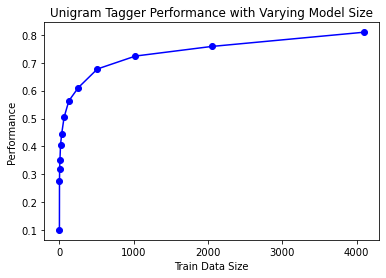

In [92]:
import pylab
def UniPerf(TrainData,TestData):
    tagger = nltk.UnigramTagger(TrainData)
    accuracy = tagger.evaluate(TestData)
    return accuracy
def plot():
    sizes = 2**pylab.arange(13)
    perfs = [UniPerf(BTaggedTrain[:size],BTaggedTest) for size in sizes]
    pylab.plot(sizes,perfs,'-bo')
    pylab.title('Unigram Tagger Performance with Varying Model Size')
    pylab.xlabel('Train Data Size')
    pylab.ylabel('Performance')
    pylab.show()
plot()

#### 27. Inspect the confusion matrix for the bigram tagger `t2` defined in 5, and identify one or more sets of tags to collapse. Define a dictionary to do the mapping, and evaluate the tagger on the simplified data.
#### 28. Experiment with taggers using the simplified tagset (or make one of your own by discarding all but the first character of each tag name). Such a tagger has fewer distinctions to make, but much less information on which to base its work. Discuss your findings.
#### 29. Recall the example of a bigram tagger which encountered a word it hadn't seen during training, and tagged the rest of the sentence as `None`. It is possible for a bigram tagger to fail part way through a sentence even if it contains no unseen words (even if the sentence was used during training). In what circumstance can this happen? Can you write a program to find some examples of this?
#### 30. Preprocess the Brown News data by replacing low frequency words with UNK, but leaving the tags untouched. Now train and evaluate a bigram tagger on this data. How much does this help? What is the contribution of the unigram tagger and default tagger now? 


In [100]:
WordFD = nltk.FreqDist(brown.words(categories='news'))
TaggedSentList = []
for sent in brown.tagged_sents(categories='news'):
    for i in sent:
        TaggedSent = []
        if WordFD[i[0]] < 3 :
            TaggedSent.append(('UNK',i[1]))
        else:
            TaggedSent.append(i)
    TaggedSentList.append(TaggedSent)
BiPreTagger = nltk.BigramTagger(TaggedSentList[:4160])
BiPreTagger.evaluate(TaggedSentList[4160:])

0.9762419006479481

#### 31. Modify the program in 4.1 to use a logarithmic scale on the x-axis, by replacing `pylab.plot()` with `pylab.semilogx()`. What do you notice about the shape of the resulting plot? Does the gradient tell you anything?

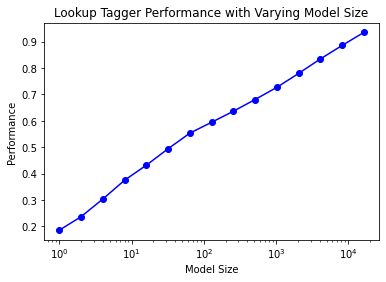

In [103]:
import pylab
def performance(cfd,WordList):
    model = dict((word,cfd[word].max()) for word in WordList)
    tagger = nltk.UnigramTagger(model=model,backoff=DefaultTagger)
    return tagger.evaluate(BTaggedSents)
def displayLog():
    WordFD = nltk.FreqDist(brown.words(categories='news')).most_common()
    WordList = [word for (word,_) in WordFD]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perf = [performance(cfd,WordList[:size]) for size in sizes]
    pylab.semilogx(sizes,perf,'-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
displayLog()

#### 32. Consult the documentation for the Brill tagger demo function, using `help(nltk.tag.brill.demo)`. Experiment with the tagger by setting different values for the parameters. Is there any trade-off between training time (corpus size) and performance?
#### 33. Write code that builds a dictionary of dictionaries of sets. Use it to store the set of POS tags that can follow a given word having a given POS tag, i.e. wordi → tagi → tagi+1.
#### 34. There are 264 distinct words in the Brown Corpus having exactly three possible tags.
##### a. Print a table with the integers 1..10 in one column, and the number of distinct words in the corpus having 1..10 distinct tags in the other column.
##### b. For the word with the greatest number of distinct tags, print out sentences from the corpus containing the word, one for each possible tag.

In [108]:
for i in range(1,10):
    num = len(set([j[0] for j in brown.tagged_words() if len(TagCFD[j[0]]) == i]))
    print(i,num)

1 47328
2 7186
3 1146
4 265
5 87
6 27
7 12
8 1
9 1


In [135]:
for i in TagCFD['to']:
    flag = False
    for sent in brown.tagged_sents():
        for word in sent:
            if word[0].lower() == 'to' and word[1] == i:
                print(' '.join([j[0] for j in sent]))
                flag = True
                break
        if flag:
            break

The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. .
It recommended that Fulton legislators act `` to have these laws studied and revised to the end of modernizing and improving them '' .
Cost up to $37 a year
Three groups to meet
Or an `` I want to go home '' , or whatever -- but a nonverbal one which reveals itself , gradually , as the condensed expression of more than one latent meaning .
On the clock given him was the inscription , `` For Outstanding Contribution to Billiken Basketball , 1960-61 '' .
When go represents itself and a complement ( being equivalent , say , to go to Martinique ) in which boat did Jack go on ? ?
As the field on which my tent was pitched was a favorite natural playground for the kids of the neighborhood , I had made many friends among them , taking part in their after-school games and tr

#### 35. Write a program to classify contexts involving the word must according to the tag of the following word. Can this be used to discriminate between the epistemic and deontic uses of must?
#### 36.  Create a regular expression tagger and various unigram and n-gram taggers, incorporating backoff, and train them on part of the Brown corpus.
##### a. Create three different combinations of the taggers. Test the accuracy of each combined tagger. Which combination works best?
##### b. Try varying the size of the training corpus. How does it affect your results?
#### 37. Our approach for tagging an unknown word has been to consider the letters of the word (using `RegexpTagger()`), or to ignore the word altogether and tag it as a noun (using `nltk.DefaultTagger()`). These methods will not do well for texts having new words that are not nouns. Consider the sentence I like to blog on Kim's blog. If blog is a new word, then looking at the previous tag (`TO` versus `NP$`) would probably be helpful. I.e. we need a default tagger that is sensitive to the preceding tag.
##### a. Create a new kind of unigram tagger that looks at the tag of the previous word, and ignores the current word. (The best way to do this is to modify the source code for `UnigramTagger()`, which presumes knowledge of object-oriented programming in Python.)
##### b. Add this tagger to the sequence of backoff taggers (including ordinary trigram and bigram taggers that look at words), right before the usual default tagger.
##### c. Evaluate the contribution of this new unigram tagger.
#### 38. Consider the code in 5 which determines the upper bound for accuracy of a trigram tagger. Review Abney's discussion concerning the impossibility of exact tagging (Church, Young, & Bloothooft, 1996). Explain why correct tagging of these examples requires access to other kinds of information than just words and tags. How might you estimate the scale of this problem?
#### 39. Use some of the estimation techniques in `nltk.probability`, such as Lidstone or Laplace estimation, to develop a statistical tagger that does a better job than n-gram backoff taggers in cases where contexts encountered during testing were not seen during training.
#### 40. Inspect the diagnostic files created by the Brill tagger `rules.out` and `errors.out`. Obtain the demonstration code by accessing the source code (at http://www.nltk.org/code) and create your own version of the Brill tagger. Delete some of the rule templates, based on what you learned from inspecting `rules.out`. Add some new rule templates which employ contexts that might help to correct the errors you saw in `errors.out`.
#### 41. Develop an n-gram backoff tagger that permits "anti-n-grams" such as ["the", "the"] to be specified when a tagger is initialized. An anti-ngram is assigned a count of zero and is used to prevent backoff for this n-gram (e.g. to avoid estimating $P(the | the)$ as just $P(the)$).
#### 42. Investigate three different ways to define the split between training and testing data when developing a tagger using the Brown Corpus: genre (category), source (fileid), and sentence. Compare their relative performance and discuss which method is the most legitimate. (You might use n-fold cross validation, discussed in 3, to improve the accuracy of the evaluations.)
#### 43. Develop your own `NgramTagger` class that inherits from NLTK's class, and which encapsulates the method of collapsing the vocabulary of the tagged training and testing data that was described in this chapter. Make sure that the unigram and default backoff taggers have access to the full vocabulary.